0 ) module을 로드합니다.

In [87]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

1 ) 데이터를 로드합니다.

2 ) 여러가지 확인해봅니다. ( describe, shape 등 )

이후 부터는 Temp와 Ozone column만 사용하겠습니다.
df에서 불필요한 column은 삭제해주세요.

In [88]:
df = pd.read_csv('C:/Users/박소희/Desktop/데이터분석/ozone.csv')
df

,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
...,...,...,...,...,...,...
148,30.0,193.0,6.9,70,9,26
149,NaN,145.0,13.2,77,9,27
150,14.0,191.0,14.3,75,9,28
151,18.0,131.0,8.0,76,9,29


In [89]:
df.describe()

,Ozone,Solar.R,Wind,Temp,Month,Day
count,116.000000,146.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922
std,32.987885,90.058422,3.523001,9.465270,1.416522,8.864520
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000
25%,18.000000,115.750000,7.400000,72.000000,6.000000,8.000000
50%,31.500000,205.000000,9.700000,79.000000,7.000000,16.000000
75%,63.250000,258.750000,11.500000,85.000000,8.000000,23.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000


In [90]:
df.shape

(153, 6)

In [91]:
df = df.loc[:,['Temp', 'Ozone']]

3 ) 결측치를 확인하고, 제거해주세요. 

In [92]:
df = df.dropna(how="any", inplace = False)
df.shape

(116, 2)

4 ) 이상치를 boxplot으로 확인해주세요.( Month, Day 제외 )

{'whiskers': [<matplotlib.lines.Line2D at 0x801d2fb2e8>,
 'caps': [<matplotlib.lines.Line2D at 0x801d2fb9e8>,
 'boxes': [<matplotlib.lines.Line2D at 0x801d2fb198>],
 'medians': [<matplotlib.lines.Line2D at 0x801d3060b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x801d306400>],
 'means': []}

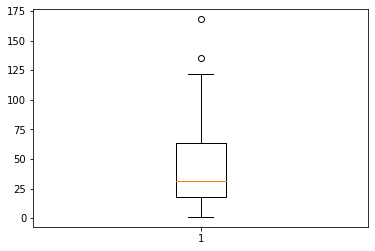

In [93]:
plt.boxplot(df["Ozone"])

{'whiskers': [<matplotlib.lines.Line2D at 0x801d35b780>,
 'caps': [<matplotlib.lines.Line2D at 0x801d35be80>,
 'boxes': [<matplotlib.lines.Line2D at 0x801d35b630>],
 'medians': [<matplotlib.lines.Line2D at 0x801e338550>],
 'fliers': [<matplotlib.lines.Line2D at 0x801e338898>],
 'means': []}

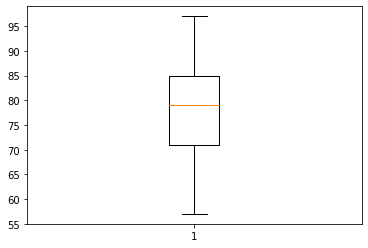

In [94]:
plt.boxplot(df["Temp"])

5 ) 이상치가 있는 column의 irq를 이용하여 이상치 범위를 구한 뒤,

이상치가 있으면 모든 행의 데이터를 제거해주세요.

* np.percentile 함수 사용 가능

In [95]:
# 1,3 분위를 구해보자
q1 = np.percentile(df["Ozone"],25)
q3 = np.percentile(df["Ozone"],75)
# 동시에 구하는 방법
q1,q3 = np.percentile(df["Ozone"],[25,75])

# irq 구하기 
irq = q3 - q1

# 이상치 범위 구하기
upper = q3 + irq * 1.5
lower = q1 - irq * 1.5

# boolean indexing의 mask 만들기 
mask_upper = df["Ozone"] > upper
mask_lower = df["Ozone"] < lower

# mask를 제외한 데이터를 가져오자
df = df.loc[~(mask_upper | mask_lower)]
df.shape

(114, 2)

6 ) tensorflow로 단순 선형 회귀 모델을 만들고자합니다.
* x 는 Temp, y 는 Ozone입니다.

In [96]:
# x, y 설정
x_data = df["Temp"]  
y_data = df["Ozone"]

In [97]:
# placeholder 
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

In [98]:
# weight, bias
W = tf.Variable(tf.random_normal([1]), name="Weight")
b = tf.Variable(tf.random_normal([1]), name="bias")

In [99]:
# hypothesis (단순선형회귀)
H = W * x + b

In [100]:
# Cost function (Loss function)
cost = tf.reduce_mean(tf.square(H-y))

In [101]:
# train node 생성
# learning_rate = 0.0001
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.0001)
train = optimizer.minimize(cost)

In [102]:
# runner(session) 필요
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [103]:
# learning, 학습
for step in range(3000):
    _,cost_val = sess.run([train,cost],
                            feed_dict={
                                   x : x_data,
                                   y : y_data
                               })

In [104]:
# 예측
# x가 81일 때 y값을 예측해주세요
print(sess.run(H, feed_dict = {x : 81}))

[44.075783]
